In [25]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [26]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [28]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [29]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [30]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
sesh = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
# first_row = sesh.query(measure).first()
# first_row.__dict__
sesh.query(measure.date).order_by(measure.date.desc()).first()

('2017-08-23',)

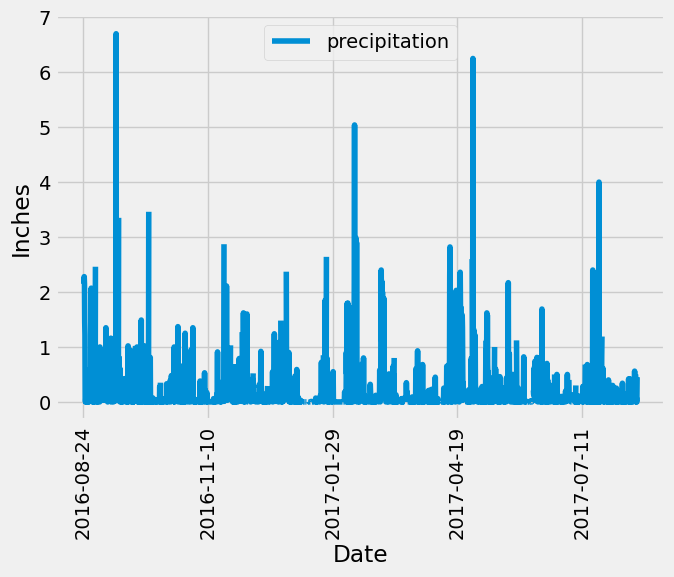

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent = sesh.query(measure.date).order_by(measure.date.desc()).first()
# Calculate the date one year from the last date in data set.
one_y = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp = sesh.query(measure.date, measure.prcp).\
                    filter(measure.date > one_y).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_d = pd.DataFrame(prcp, columns=['date', 'precipitation'])

# Sort the dataframe by date
prec = prcp_d.set_index('date')
prcp_df = prec.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_df.plot(rot=90, xlabel = 'Date', ylabel='Inches', figsize=(7,5,))
plt.show()

# Show the plot
plt.show()

In [35]:
stations = sesh.query(station.station).all()
print(stations)

[('USC00519397',), ('USC00513117',), ('USC00514830',), ('USC00517948',), ('USC00518838',), ('USC00519523',), ('USC00519281',), ('USC00511918',), ('USC00516128',)]


In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
sesh.query(station.station).count()

9

In [38]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = sesh.query(measure.station, func.count(measure.station)).\
                            group_by(measure.station).\
                            order_by(func.count(measure.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measure.tobs), func.max(measure.tobs), func.avg(measure.tobs)]

temp = sesh.query(*sel).filter(measure.station =='USC00519281').all()
temp

[(54.0, 85.0, 71.66378066378067)]

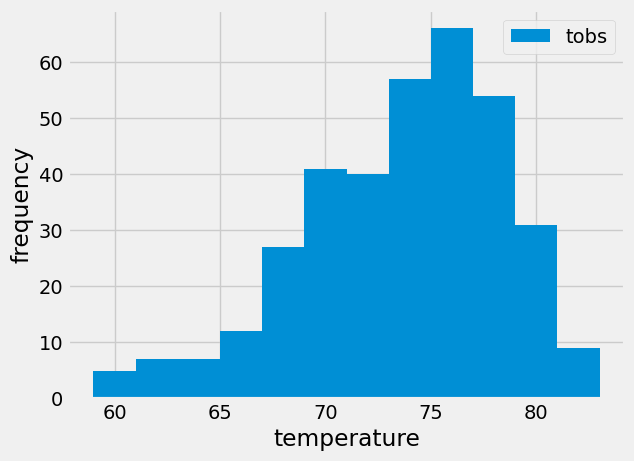

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_year = sesh.query(measure.date).filter(measure.station =='USC00519281').order_by(measure.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_y_t = dt.date(2017,8,18) - dt.timedelta(days=365)

# Perform a query to retrieve the date and temperatures
temp = sesh.query(measure.date, measure.tobs).\
                    filter(measure.date > one_y_t).\
                    filter(measure.station =='USC00519281').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
temp_d = pd.DataFrame(temp, columns=['date', 'temperature'])

# Sort the dataframe by date
tempe_d = temp_d.set_index('date')
temp_df = tempe_d.sort_values(by='date')

# plot
plt.hist(temp_df['temperature'],bins=12,label='tobs')
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.legend()
plt.show()

# Close Session

In [42]:
# Close Session
sesh.close()

In [43]:
temp_df

,temperature
date,
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0
2016-08-23,77.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0
